In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt
import matplotlib.dates as mdates

In [2]:
path = 'C:/Users/LENOVO/OneDrive/WaterSprint/ADB Project/DataSet Comparison/'

In [3]:
CHIRPS = pd.read_csv(path+'CHIRPSPPT_Barkhan.csv')

In [4]:
CHIRPS['Cummulative_rainfall(mm)'] = CHIRPS['PPT in mm'].cumsum()

In [5]:
ERA5_TEMP = pd.read_csv(path+'Kaha_era5_temp.csv')

In [6]:
ERA5_PPT = pd.read_csv(path+'Kaha_era5_rain.csv')

In [7]:
ERA5_PPT['Cummulative_rainfall(mm)'] = ERA5_PPT['ppt in mm'].cumsum()

In [8]:
PMD = pd.read_csv(path+'PMD-Barakhan1.csv')

In [15]:
PMD = PMD[PMD['Precipitation(mm)'] != 'Trace']
PMD['Precipitation(mm)'].replace('----',0,inplace=True)
PMD['Precipitation(mm)'].replace('*',0,inplace=True)
PMD['Precipitation(mm)'].replace('-99.9',0,inplace=True)

In [16]:
PMD['Precipitation(mm)'] = PMD['Precipitation(mm)'].astype(float)

In [17]:
PMD['Cummulative_rainfall(mm)'] = PMD['Precipitation(mm)'].cumsum()

In [18]:
type(PMD['Precipitation(mm)'][1])

numpy.float64

In [162]:
rainfall = pd.DataFrame(columns= ['year','ppt in mm(PMD)','ppt in mm(ERA5)','ppt in mm(CHIRPS)'])

In [117]:
a = 1988
ls = []
for i in range(30):
    ls.append(a)
    a+=1

In [118]:
rainfall['year'] = ls

In [134]:
rainfall_era5 = ERA5_PPT.groupby(ERA5_PPT['year'], as_index=False)['ppt in mm'].sum()

In [135]:
rainfall_chirps = CHIRPS.groupby(CHIRPS['year'], as_index=False)['PPT in mm'].sum()

In [170]:
rainfall_PMD = PMD.groupby(PMD['YEAR'], as_index=False)['Precipitation(mm)'].sum()

In [179]:
rainfall['year'] = rainfall_PMD['YEAR'] 
rainfall['ppt in mm(PMD)'] = rainfall_PMD['Precipitation(mm)']
rainfall['ppt in mm(ERA5)'] = rainfall_era5['ppt in mm']
rainfall['ppt in mm(CHIRPS)'] = rainfall_chirps['PPT in mm']

In [ ]:
rainfall

(0.0, 800.0)

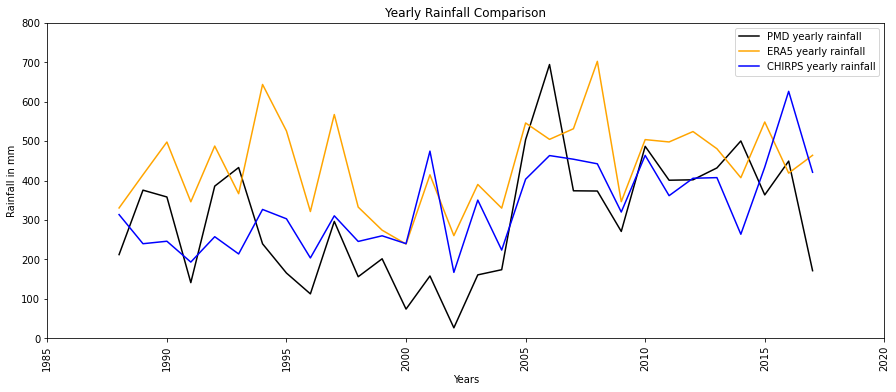

In [308]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(bottom=0.15)
plt.xticks(rotation=90)

# Create a plot with multiple lines
plt.plot('year', 'ppt in mm(PMD)', data=rainfall, label='PMD yearly rainfall', color='black')
plt.plot('year', 'ppt in mm(ERA5)', data=rainfall, label='ERA5 yearly rainfall',color='orange')
plt.plot('year', 'ppt in mm(CHIRPS)', data=rainfall, label='CHIRPS yearly rainfall',color='blue')

#Labelling the plot
plt.legend(loc='upper right')
plt.xlabel('Years')
plt.ylabel('Rainfall in mm')
plt.title('Yearly Rainfall Comparison')
plt.xlim([1985, 2020])
plt.ylim([0, 800])


Text(0.5, 1.0, 'Precipitation Time Series')

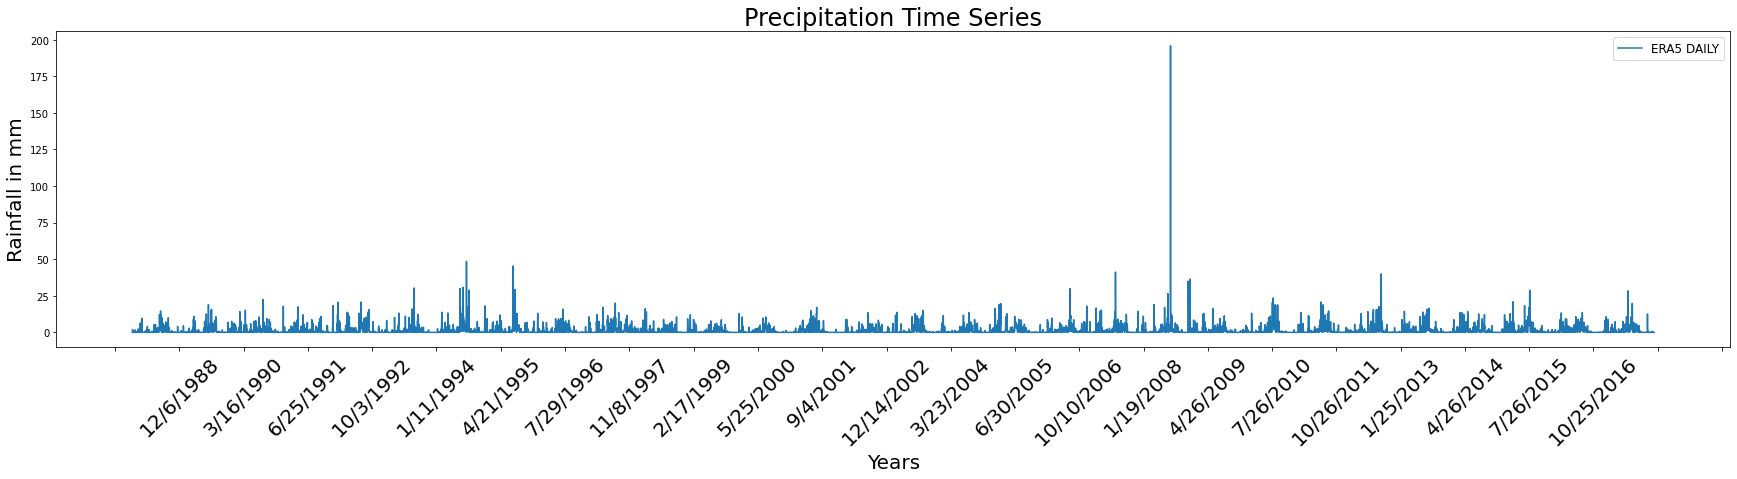

In [314]:
plt.figure(figsize=(30, 6))
plt.subplots_adjust(bottom=0.15)
plt.xticks(rotation=45)
plt.xticks(fontsize=20)
# Set the x-tick locations and labels
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=15)) # Show tick every month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Set format of the tick
# Create a plot with multiple lines
plt.plot('date', 'ppt in mm', data=ERA5_PPT, label='ERA5 DAILY')

#Labelling the plot
plt.legend(loc='upper left')
plt.legend(fontsize='large')
plt.xlabel('Years',fontsize = '20')
plt.ylabel('Rainfall in mm',fontsize = '20')
plt.title('Precipitation Time Series', fontsize= '24')

Text(0.5, 1.0, 'Precipitation Time Series')

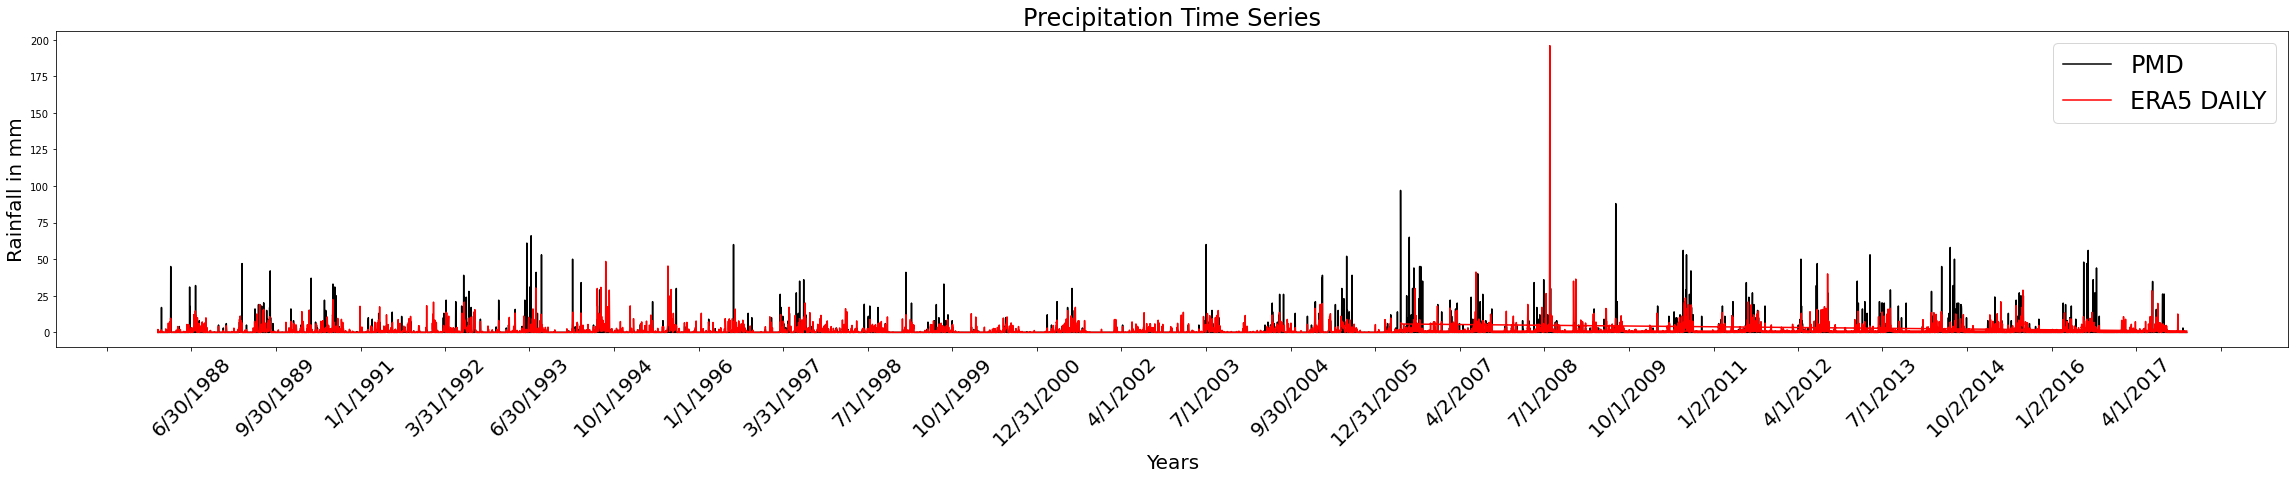

In [320]:
plt.figure(figsize=(40, 6))
plt.subplots_adjust(bottom=0.15)
plt.xticks(rotation=45)
plt.xticks(fontsize=20)
# Set the x-tick locations and labels
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=15)) # Show tick every month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Set format of the tick
# Create a plot with multiple lines
plt.plot('date', 'Precipitation(mm)', data=PMD, label='PMD', color='black')
plt.plot('date', 'ppt in mm', data=ERA5_PPT, label='ERA5 DAILY', color='red')

#Labelling the plot
plt.legend(loc='upper left')
plt.legend(fontsize='24')
plt.xlabel('Years',fontsize = '20')
plt.ylabel('Rainfall in mm',fontsize = '20')
plt.title('Precipitation Time Series', fontsize= '24')

Text(0.5, 1.0, 'Precipitation Time Series')

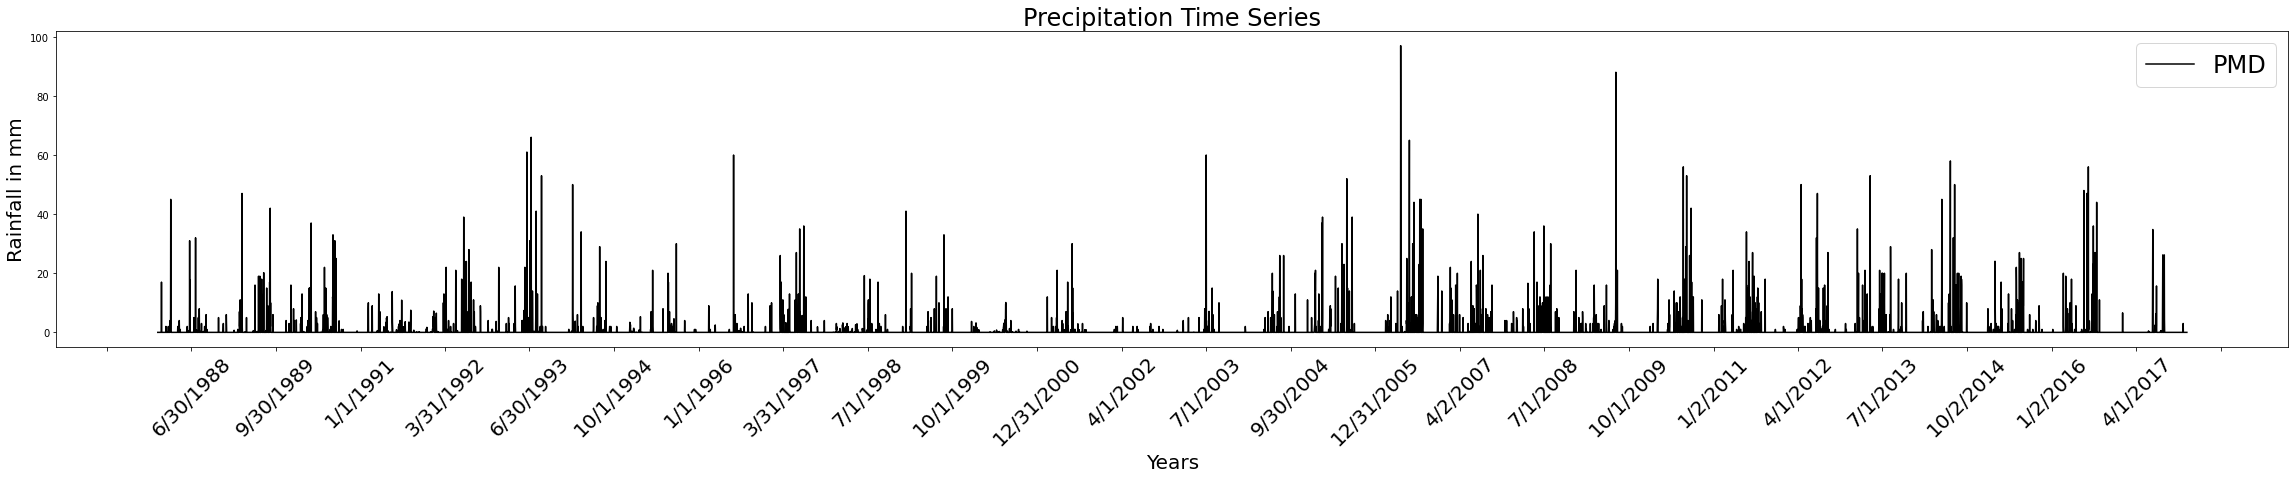

In [321]:
plt.figure(figsize=(40, 6))
plt.subplots_adjust(bottom=0.15)
plt.xticks(rotation=45)
plt.xticks(fontsize=20)
# Set the x-tick locations and labels
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=15)) # Show tick every month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Set format of the tick
# Create a plot with multiple lines
plt.plot('date', 'Precipitation(mm)', data=PMD, label='PMD', color='black')

#Labelling the plot
plt.legend(loc='upper left')
plt.legend(fontsize='24')
plt.xlabel('Years',fontsize = '20')
plt.ylabel('Rainfall in mm',fontsize = '20')
plt.title('Precipitation Time Series', fontsize= '24')

Text(0.5, 1.0, 'Precipitation Time Series')

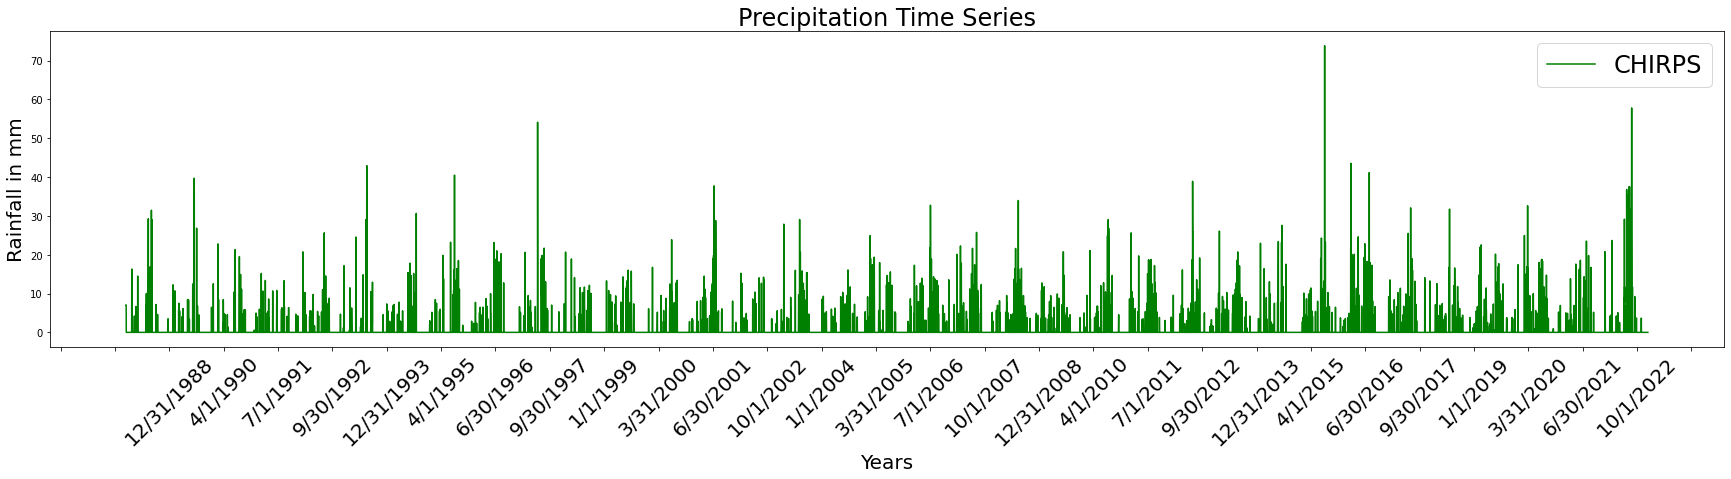

In [311]:
plt.figure(figsize=(30, 6))
plt.subplots_adjust(bottom=0.15)
plt.xticks(rotation=45)
plt.xticks(fontsize=20)
# Set the x-tick locations and labels
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=15)) # Show tick every month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Set format of the tick
# Create a plot with multiple lines
plt.plot('date', 'PPT in mm', data=CHIRPS, label='CHIRPS', color ='green')

#Labelling the plot
plt.legend(loc='upper left')
plt.legend(fontsize='24')
plt.xlabel('Years' ,fontsize = '20')
plt.ylabel('Rainfall in mm',fontsize = '20')
plt.title('Precipitation Time Series', fontsize= '24')

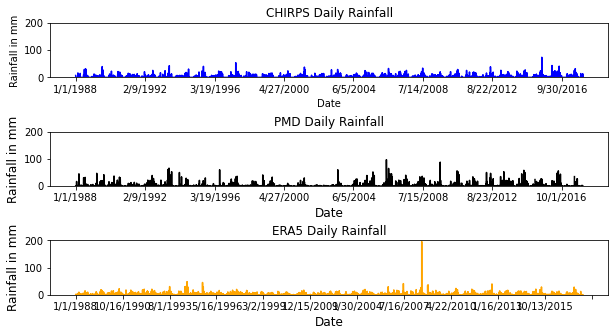

In [26]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))

fig.subplots_adjust(hspace=1)

# set the x-axis ticker to only show years

axs[0].plot(CHIRPS['date'], CHIRPS['PPT in mm'], color ='blue')
axs[0].xaxis.set_major_locator(plt.MaxNLocator(12))
axs[0].set_title('CHIRPS Daily Rainfall')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Rainfall in mm')
axs[0].set_ylim([0,200])


axs[1].xaxis.set_major_locator(plt.MaxNLocator(12))
axs[1].plot(PMD['date'], PMD['Precipitation(mm)'],color='black')
axs[1].set_title('PMD Daily Rainfall')
axs[1].set_xlabel('Date',fontsize='12')
axs[1].set_ylabel('Rainfall in mm',fontsize='12')
axs[1].set_ylim([0,200])

axs[2].xaxis.set_major_locator(plt.MaxNLocator(12))
axs[2].plot(ERA5_PPT['date'], ERA5_PPT['ppt in mm'],color='orange')
axs[2].set_title('ERA5 Daily Rainfall')
axs[2].set_xlabel('Date',fontsize='12')
axs[2].set_ylabel('Rainfall in mm',fontsize='12')
axs[2].set_ylim([0,200])


plt.show()

In [33]:
from scipy.signal import savgol_filter

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core.multiarray failed to import

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
import scipy

(0.0, 40000.0)

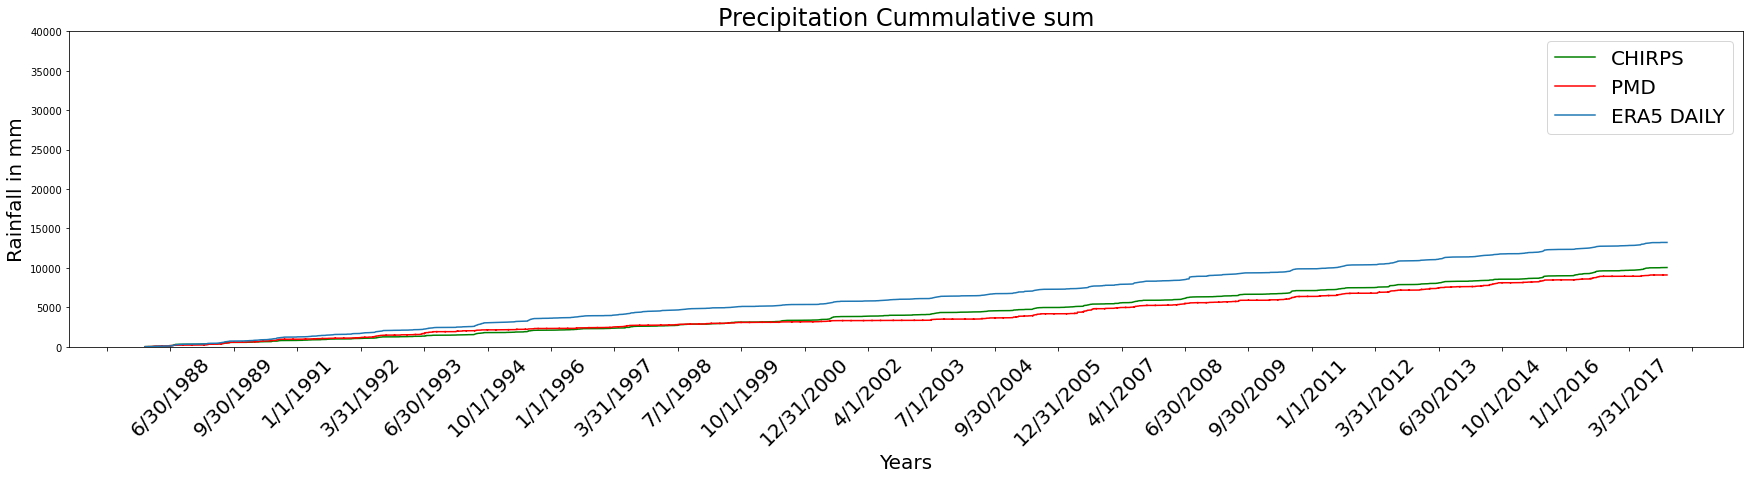

In [29]:
#Cummuativte Sum
plt.figure(figsize=(30, 6))
plt.subplots_adjust(bottom=0.15)
plt.xticks(rotation=45)
plt.xticks(fontsize=20)
# Set the x-tick locations and labels
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=15)) # Show tick every month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y')) # Set format of the tick
# Create a plot with multiple lines

plt.plot('date', 'Cummulative_rainfall(mm)', data=CHIRPS, label='CHIRPS', color ='green')
plt.plot('date', 'Cummulative_rainfall(mm)', data=PMD, label='PMD', color='red')
plt.plot('date', 'Cummulative_rainfall(mm)', data=ERA5_PPT, label='ERA5 DAILY')

#Labelling the plot
plt.legend(loc='upper left')
plt.legend(fontsize='20')
plt.xlabel('Years',fontsize = '20')
plt.ylabel('Rainfall in mm',fontsize = '20')
plt.title('Precipitation Cummulative sum', fontsize= '24')
plt.ylim(0,40000)